# Simple Linear Regression with `statsmodels`

The Python libraries `statsmodels` and `scikit-learn` make implementing linear regression very easy - much easier than implementing from scratch like we did in the last lesson.

We will start with the `statsmodels` library. First, let's import the `advertising` data.

In [1]:
# Import necessary libaries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Import and display first five rows of advertising dataset
github_path = 'https://raw.githubusercontent.com/huangyh09/foundation-data-science/'
dat_dir = github_path + 'main/w9-regression/'
# dat_dir = './'

advert = pd.read_csv(dat_dir + 'advertising.csv')
advert.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [2]:
# r, c = advert.shape  #print("nb of rows =",r)

advert.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


This dataset contains data about the advertising budget spent on TV, Radio, and Newspapers for a particular product and the resulting sales. We expect a positive correlation between such <b>advertising costs</b> and <b>sales</b>. 

Let’s start with <b> TV advertising costs</b> to create a simple linear regression model. First let’s plot the variables to get a better sense of their relationship:

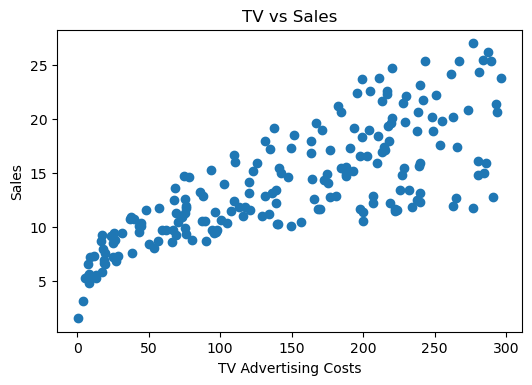

In [3]:
# Create scatter plot
plt.figure(dpi=100)
plt.plot(advert['TV'], advert['Sales'], 'o')
plt.xlabel('TV Advertising Costs')
plt.ylabel('Sales')
plt.title('TV vs Sales')

plt.show()

As TV advertisement cost increases, sales also increase – they are positively correlated! 

Now with the `statsmodels` library, let’s create a line of best fit using the least sum of square method.

In [4]:
import statsmodels.formula.api as smf

# Initialise and fit linear regression model using `statsmodels`
model1 = smf.ols('Sales ~ TV', data=advert)
model1 = model1.fit()

In the above code, we used `statsmodels`’ `ols` function to initialise our simple linear regression model. This takes the formula `y ~ X`, where `X` is the predictor variable (TV advertising costs) and `y` is the output variable (Sales). Then, we fit the model by calling the OLS object’s `fit()` method. If you’d like to learn more about `ols`, you can read the documentation [here](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html).

Calling `.params` will show us the model’s parameters:

In [5]:
model1.params

Intercept    7.032594
TV           0.047537
dtype: float64

In the notation that we have been using, $\alpha$ is the intercept and  $\beta$ is the slope i.e.:

$\alpha = 7.032, \quad \beta = 0.047$

Thus, the equation for the model will be:

$\text{Sales} = 7.032 + 0.047*\text{TV}$

Let's also check an indicator of the model efficacy, *R<sup>2</sup>*. Luckily, `statsmodel` gives us a ready-made method for doing this so we don’t need to code all the math ourselves:

In [6]:
model1.rsquared

0.611875050850071

We can also take a look at the model summary by writing this snippet:

In [7]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 01 Nov 2021   Prob (F-statistic):           1.47e-42
Time:                        13:41:03   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

There is a lot here. Of these results, we have discussed:
- R-squared
- F-statistic
- Prob (F-statistic) - this is the p-value of the F-statistic
- Intercept coef - this is `alpha`
- TV coef - this is `beta` for predictor `TV`
- P>|t| - this is the p-value for our coefficients

You can learn more about the other linear regression results [here](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.html).

Now that we’ve fit a simple regression model, we can try to predict the values of sales based on the equation we just derived!

In [8]:
sales_pred = model1.predict(advert['TV'])

The `.predict` method predicts sales value for each row based on the model equation using TV costs. This is the equivalent of manually typing out our equation: `sales_pred = 7.032 + 0.047*(advert['TV'])`.

We can visualise our regression model by plotting `sales_pred` against the TV advertising costs to find the line of best fit:

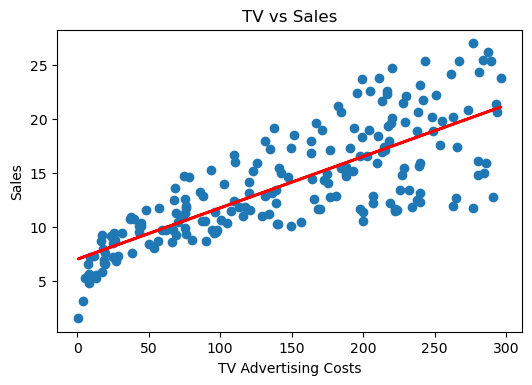

In [9]:
# Plot regression against actual data
plt.figure(dpi=100)
plt.plot(advert['TV'], advert['Sales'], 'o')           # scatter plot showing actual data
plt.plot(advert['TV'], sales_pred, 'r', linewidth=2)   # regression line
plt.xlabel('TV Advertising Costs')
plt.ylabel('Sales')
plt.title('TV vs Sales')

plt.show()

Now let's calculate the RSE to measure how accurate our model is in predicting sales:

In [10]:
# Sums of squares and identity 

#Create new column to store predictions
advert['sales_pred'] = sales_pred

salesmean = np.mean(advert['Sales'])

# Checking the identity: SST = SSR + SSD  
advert['SST'] = (advert['Sales'] - salesmean)**2
SST = advert['SST'].sum()
advert['SSR'] = (advert['sales_pred'] - salesmean)**2
SSR = advert['SSR'].sum()
advert['SSD'] = (advert['Sales'] - advert['sales_pred'])**2
SSD = advert['SSD'].sum()

print(f'SST={np.round(SST,4)},  SSR={np.round(SSR,4)},  SSD={np.round(SSD,4)}\n')

print(f'SST-(SSR+SSD) = {np.round(SST-(SSR+SSD),4)}\n')

 


SST=5417.1488,  SSR=3314.6182,  SSD=2102.5306

SST-(SSR+SSD) = -0.0



In [11]:
# Calculate RSE

RSE = np.sqrt(SSD / 198)   # n = 200
salesmean = np.mean(advert['Sales'])
error = RSE / salesmean

print(f'RSE = {np.round(RSE,4)},  Mean sale = {salesmean}\nError = {np.round(error, 4)*100}%')

RSE = 3.2587,  Mean sale = 14.022500000000003
Error = 23.24%


Thus, this model has an average accuracy of 76.76%. This can definitely be improved upon!

In the next step, we will add more features as predictors and see whether it improves our model. Go to the  the notebook called `Reg5Multiple regression with statsmodels.ipynb`.

In [12]:
SSR/SST 
print(f'R2 = {np.round(SSR/SST,4)}')

R2 = 0.6119
